<div class="alert alert-block alert-success">
<h3>Conclusiones</h3>
</div>

In [9]:
%pip install -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
raw_data_path='../data/raw/road_traffic_accidents_dataset.csv'
raw_data = pd.read_csv(raw_data_path)


<div class="alert alert-block alert-danger">
<h5>Lesividad por SEXO</h5>
</div>

  Sex_of_driver Accident_severity  Probability
0        Female      Fatal injury     0.007133
1          Male      Fatal injury     0.013290
2        Female    Serious Injury     0.148359
3          Male    Serious Injury     0.141733
4        Female     Slight Injury     0.844508
5          Male     Slight Injury     0.844977

Accident_severity  Fatal injury  Serious Injury  Slight Injury    All
Sex_of_driver                                                        
Female                        5             104            592    701
Male                        152            1621           9664  11437
All                         157            1725          10256  12138


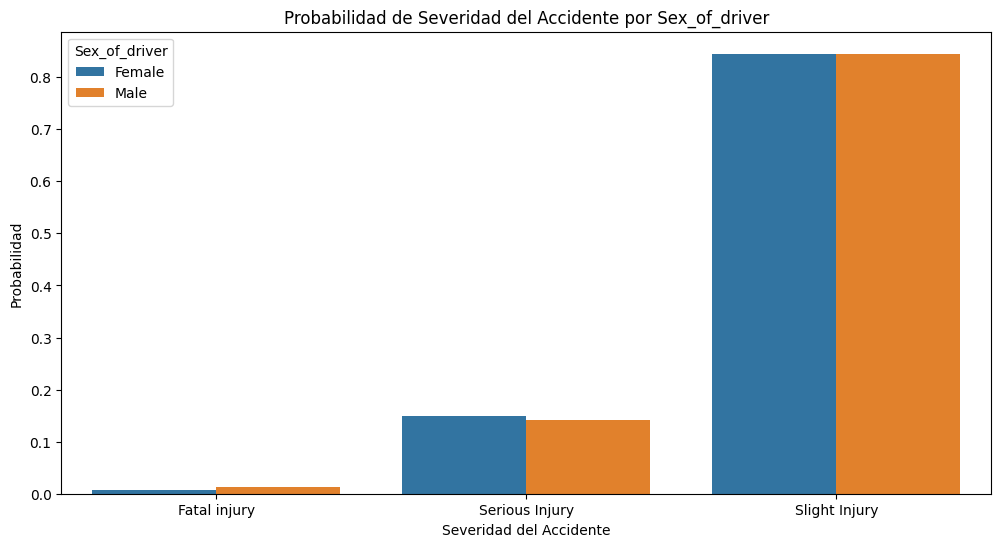

In [12]:
survey = 'Sex_of_driver'

table = pd.crosstab(
    index=raw_data[survey].loc[raw_data[survey] != "Unknown"],
    columns=raw_data['Accident_severity'],
    margins=True
)

rows_list = []

for severity in table.columns[:-1]:
    for data_survey in table.index[:-1]:
        if table.loc[data_survey, 'All'] > 0:
            prob = table.loc[data_survey, severity] / table.loc[data_survey, 'All']
        else:
            prob = 0
        
        new_row = pd.DataFrame({
            survey: [data_survey],
            'Accident_severity': [severity],
            'Probability': [prob]
        })

        rows_list.append(new_row)  
        
probabilities = pd.concat(rows_list, ignore_index=True)

print(probabilities)

print()

print(table)

plt.figure(figsize=(12, 6))

sns.barplot(x='Accident_severity', y='Probability', hue=survey, data=probabilities)

plt.title(f'Probabilidad de Severidad del Accidente por {survey}')
plt.ylabel('Probabilidad')
plt.xlabel('Severidad del Accidente')
plt.legend(title=survey)
plt.show()


<div class="alert alert-block alert-info">
<p>El sexo no influye en el número de accidentes</p>
</div>

---
---

<div class="alert alert-block alert-danger">
<h5>Lesividad por RANGO DE EDAD</h5>
</div>

   Age_band_of_driver Accident_severity  Probability
0               18-30      Fatal injury     0.014517
1               31-50      Fatal injury     0.013213
2             Over 51      Fatal injury     0.015142
3            Under 18      Fatal injury     0.014545
4               18-30    Serious Injury     0.141419
5               31-50    Serious Injury     0.132371
6             Over 51    Serious Injury     0.162145
7            Under 18    Serious Injury     0.204848
8               18-30     Slight Injury     0.844065
9               31-50     Slight Injury     0.854416
10            Over 51     Slight Injury     0.822713
11           Under 18     Slight Injury     0.780606

Accident_severity   Fatal injury  Serious Injury  Slight Injury    All
Age_band_of_driver                                                    
18-30                         62             604           3605   4271
31-50                         54             541           3492   4087
Over 51                   

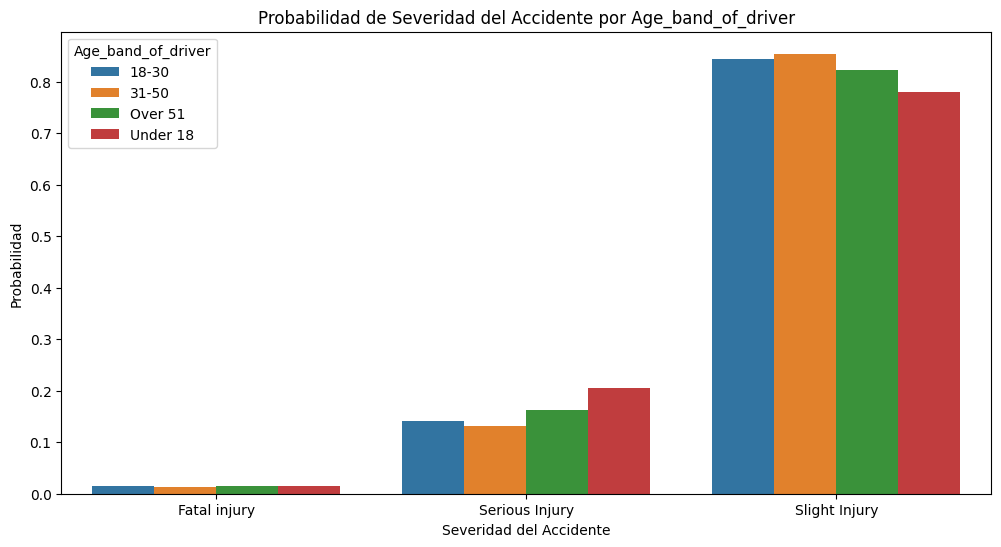

In [13]:
survey = 'Age_band_of_driver'

table = pd.crosstab(
    index=raw_data[survey].loc[raw_data[survey] != "Unknown"],
    columns=raw_data['Accident_severity'],
    margins=True
)

rows_list = []

for severity in table.columns[:-1]:
    for data_survey in table.index[:-1]:
        if table.loc[data_survey, 'All'] > 0:
            prob = table.loc[data_survey, severity] / table.loc[data_survey, 'All']
        else:
            prob = 0
        
        new_row = pd.DataFrame({
            survey: [data_survey],
            'Accident_severity': [severity],
            'Probability': [prob]
        })

        rows_list.append(new_row)  
        
probabilities = pd.concat(rows_list, ignore_index=True)

print(probabilities)

print()

print(table)

plt.figure(figsize=(12, 6))

sns.barplot(x='Accident_severity', y='Probability', hue=survey, data=probabilities)

plt.title(f'Probabilidad de Severidad del Accidente por {survey}')
plt.ylabel('Probabilidad')
plt.xlabel('Severidad del Accidente')
plt.legend(title=survey)
plt.show()


<div class="alert alert-block alert-info">
<p>La edad influye negativamente en la gravedad de las lesiones</p>
</div>

---
---

<div class="alert alert-block alert-danger">
<h5>Siniestralidad por NIVEL EDUCATIVO</h5>
</div>

     Educational_level Accident_severity  Probability
0    Above high school      Fatal injury     0.013812
1    Elementary school      Fatal injury     0.011096
2          High school      Fatal injury     0.013514
3           Illiterate      Fatal injury     0.000000
4   Junior high school      Fatal injury     0.012731
5    Writing & reading      Fatal injury     0.017045
6    Above high school    Serious Injury     0.146409
7    Elementary school    Serious Injury     0.145169
8          High school    Serious Injury     0.131532
9           Illiterate    Serious Injury     0.133333
10  Junior high school    Serious Injury     0.142145
11   Writing & reading    Serious Injury     0.125000
12   Above high school     Slight Injury     0.839779
13   Elementary school     Slight Injury     0.843736
14         High school     Slight Injury     0.854955
15          Illiterate     Slight Injury     0.866667
16  Junior high school     Slight Injury     0.845124
17   Writing & reading     S

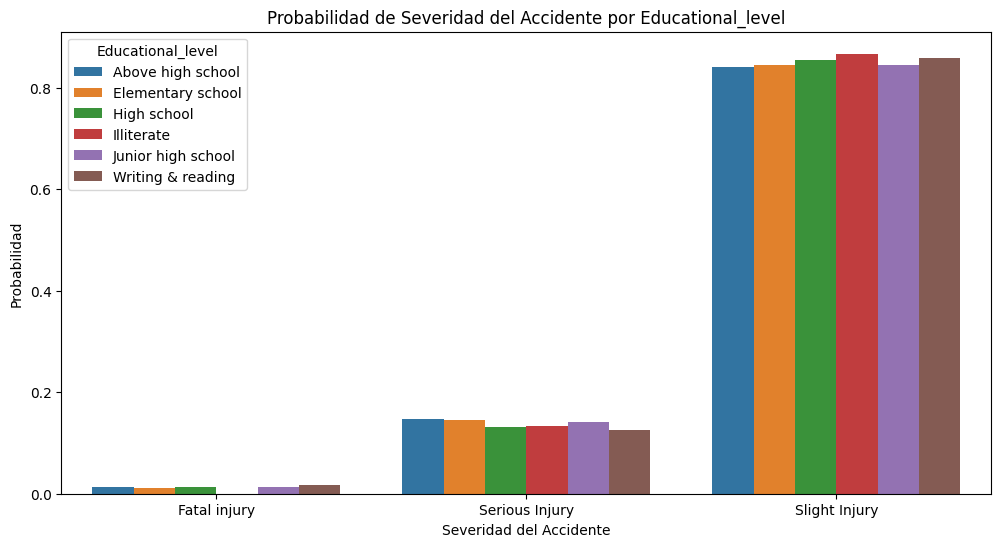

In [14]:
survey = 'Educational_level'

table = pd.crosstab(
    index=raw_data[survey].loc[raw_data[survey] != "Unknown"],
    columns=raw_data['Accident_severity'],
    margins=True
)

rows_list = []

for severity in table.columns[:-1]:
    for data_survey in table.index[:-1]:
        if table.loc[data_survey, 'All'] > 0:
            prob = table.loc[data_survey, severity] / table.loc[data_survey, 'All']
        else:
            prob = 0
        
        new_row = pd.DataFrame({
            survey: [data_survey],
            'Accident_severity': [severity],
            'Probability': [prob]
        })

        rows_list.append(new_row)  
        
probabilities = pd.concat(rows_list, ignore_index=True)

print(probabilities)

print()

print(table)

plt.figure(figsize=(12, 6))

sns.barplot(x='Accident_severity', y='Probability', hue=survey, data=probabilities)

plt.title(f'Probabilidad de Severidad del Accidente por {survey}')
plt.ylabel('Probabilidad')
plt.xlabel('Severidad del Accidente')
plt.legend(title=survey)
plt.show()

    Educational_level  Number_of_Accidents  Percentage
0   Above high school                  362    3.154684
1   Elementary school                 2163   18.849673
2         High school                 1110    9.673203
3          Illiterate                   45    0.392157
4  Junior high school                 7619   66.396514
5   Writing & reading                  176    1.533769


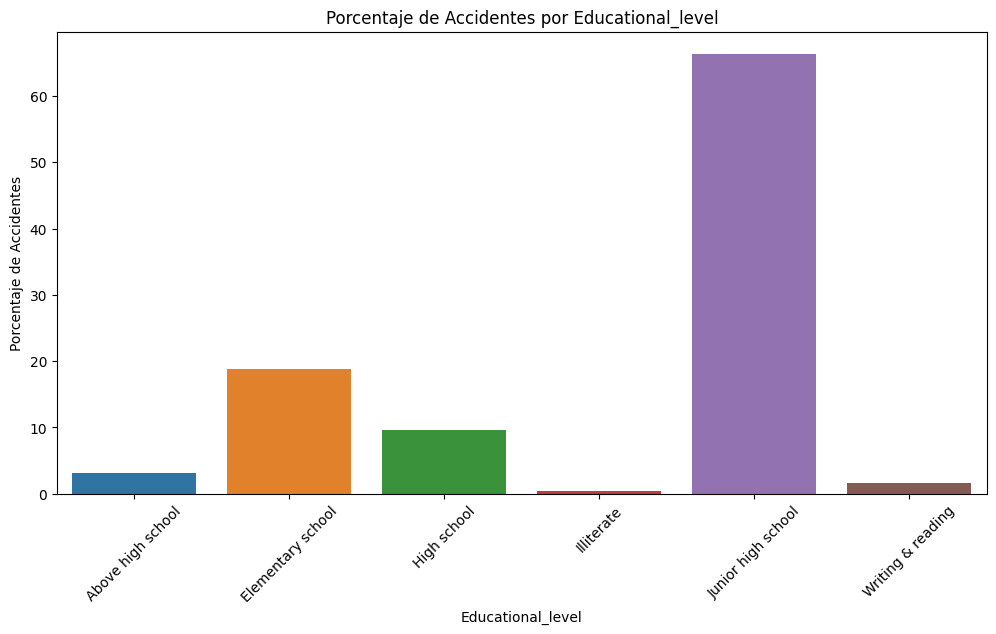

In [15]:
table = pd.crosstab(index=raw_data[survey].loc[raw_data[survey] != "Unknown"], columns='Count')

total_accidents = table['Count'].sum()

table['Percentage'] = (table['Count'] / total_accidents) * 100

table = table.reset_index()

table.columns = [survey, 'Number_of_Accidents', 'Percentage']

print(table)

plt.figure(figsize=(12, 6))
sns.barplot(x=survey, y='Percentage', data=table, errorbar=None, hue=survey)

plt.title(f'Porcentaje de Accidentes por {survey}')
plt.ylabel('Porcentaje de Accidentes')
plt.xlabel(survey)
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-info">
<p>El nivel educativo no influye en el número de accidentes</p>
</div>

---
---


<div class="alert alert-block alert-danger">
<h5>Lesividad por ANTIGÜEDAD DEL VEHICULO</h5>
</div>

   Service_year_of_vehicle Accident_severity  Probability
0                    1-2yr      Fatal injury     0.010883
1                   2-5yrs      Fatal injury     0.015625
2                  5-10yrs      Fatal injury     0.012500
3               Above 10yr      Fatal injury     0.009063
4                Below 1yr      Fatal injury     0.021277
5                    1-2yr    Serious Injury     0.134220
6                   2-5yrs    Serious Injury     0.141183
7                  5-10yrs    Serious Injury     0.149219
8               Above 10yr    Serious Injury     0.140483
9                Below 1yr    Serious Injury     0.152482
10                   1-2yr     Slight Injury     0.854897
11                  2-5yrs     Slight Injury     0.843192
12                 5-10yrs     Slight Injury     0.838281
13              Above 10yr     Slight Injury     0.850453
14               Below 1yr     Slight Injury     0.826241

Accident_severity        Fatal injury  Serious Injury  Slight Injury   

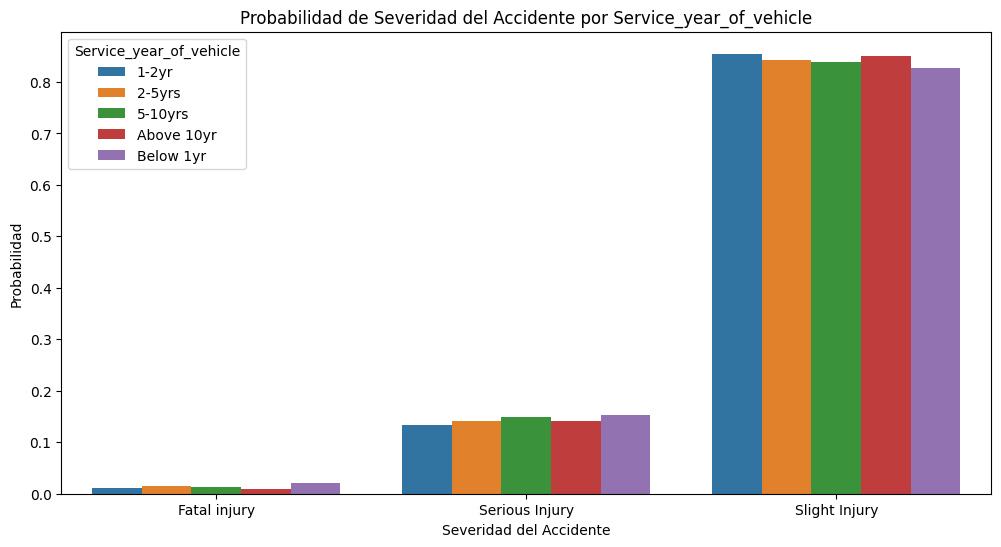

In [16]:
survey = 'Service_year_of_vehicle'

table = pd.crosstab(
    index=raw_data[survey].loc[raw_data[survey] != "Unknown"],
    columns=raw_data['Accident_severity'],
    margins=True
)

rows_list = []

for severity in table.columns[:-1]:
    for data_survey in table.index[:-1]:
        if table.loc[data_survey, 'All'] > 0:
            prob = table.loc[data_survey, severity] / table.loc[data_survey, 'All']
        else:
            prob = 0
        
        new_row = pd.DataFrame({
            survey: [data_survey],
            'Accident_severity': [severity],
            'Probability': [prob]
        })

        rows_list.append(new_row)  
        
probabilities = pd.concat(rows_list, ignore_index=True)

print(probabilities)

print()

print(table)

plt.figure(figsize=(12, 6))

sns.barplot(x='Accident_severity', y='Probability', hue=survey, data=probabilities)

plt.title(f'Probabilidad de Severidad del Accidente por {survey}')
plt.ylabel('Probabilidad')
plt.xlabel('Severidad del Accidente')
plt.legend(title=survey)
plt.show()

<div class="alert alert-block alert-info">
<p>La antigüedad del vehículo no influye en el número de accidentes</p>
</div>